<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/DAY9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

def create_mumbai_property_data():
    """Create realistic Mumbai property dataset with pricing factors"""
    n_properties = 300  # Property listings

    # Mumbai micro-markets with realistic location scores
    locations = {
        'South Mumbai': 9.5, 'Bandra': 9.0, 'Juhu': 8.8, 'Powai': 8.2,
        'Andheri': 7.5, 'Malad': 6.8, 'Dadar': 6.5, 'Chembur': 6.2,
        'Thane': 5.8, 'Borivali': 5.5
    }

    # Property types with multipliers
    property_types = ['Apartment', '2BHK', '3BHK', 'Villa', 'Penthouse']

    # Generate realistic property data
    data = []

    for _ in range(n_properties):
        location = np.random.choice(list(locations.keys()))
        location_score = locations[location]

        # Base area with realistic distribution
        area = np.random.normal(1000, 400)
        area = max(400, min(3000, area))  # Realistic bounds

        # Bedrooms based on area (realistic relationship)
        if area < 600:
            bedrooms = np.random.choice([1, 2], p=[0.7, 0.3])
        elif area < 1000:
            bedrooms = np.random.choice([2, 3], p=[0.6, 0.4])
        elif area < 1500:
            bedrooms = np.random.choice([2, 3, 4], p=[0.2, 0.6, 0.2])
        else:
            bedrooms = np.random.choice([3, 4, 5], p=[0.3, 0.5, 0.2])

        # Age of property (years)
        age = np.random.exponential(8)  # Mumbai properties tend to be older
        age = min(50, max(0, age))

        # Floor number
        floor = np.random.randint(1, 25)

        # Amenities score (0-10)
        amenities_score = np.random.normal(6.5, 2)
        amenities_score = max(0, min(10, amenities_score))

        # Price calculation with realistic Mumbai market factors
        base_price_per_sqft = 15000  # Base price per sq ft in Mumbai

        # Location premium/discount
        location_multiplier = location_score / 5.0

        # Area efficiency (smaller per sq ft cost for larger properties)
        area_factor = 1 + np.log(area/1000) * 0.1

        # Bedroom premium
        bedroom_premium = 1 + (bedrooms - 2) * 0.05

        # Age depreciation
        age_factor = max(0.7, 1 - age * 0.008)

        # Floor premium (higher floors cost more, but not linear)
        floor_factor = 1 + (floor - 1) * 0.01

        # Amenities factor
        amenities_factor = 1 + (amenities_score - 5) * 0.02

        # Calculate final price with some random variation
        price = (base_price_per_sqft * area * location_multiplier *
                area_factor * bedroom_premium * age_factor *
                floor_factor * amenities_factor *
                np.random.uniform(0.8, 1.2))

        data.append({
            'price': round(price, -4),  # Round to nearest 10k
            'area_sqft': round(area),
            'bedrooms': bedrooms,
            'location': location,
            'location_score': location_score,
            'age_years': round(age, 1),
            'floor': floor,
            'amenities_score': round(amenities_score, 1)
        })

    return pd.DataFrame(data)

# Create the dataset
property_data = create_mumbai_property_data()
print("Mumbai Property Dataset Created!")
print(f"Dataset Shape: {property_data.shape}")
print("\nFirst 5 properties:")
print(property_data.head())

Mumbai Property Dataset Created!
Dataset Shape: (300, 8)

First 5 properties:
        price  area_sqft  bedrooms location  location_score  age_years  floor  \
0  15270000.0        780         3    Dadar             6.5        7.3     19   
1  16970000.0        646         3  Chembur             6.2        0.5     24   
2  34540000.0       1585         3    Malad             6.8        0.2     10   
3  24380000.0       1057         3     Juhu             8.8       15.7      7   
4   8700000.0        400         1    Dadar             6.5        2.1     15   

   amenities_score  
0              7.5  
1              5.7  
2              9.6  
3              6.4  
4              8.7  


In [5]:
print("\n" + "="*60)
print("=== BASIC CORRELATION ANALYSIS ===")
print("="*60)

# Select numerical features for correlation analysis
numerical_features = ['price', 'area_sqft', 'bedrooms', 'location_score',
                     'age_years', 'floor', 'amenities_score']

# Calculate correlation matrix
correlation_matrix = property_data[numerical_features].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Focus on price correlations
price_correlations = correlation_matrix['price'].drop('price').sort_values(key=abs, ascending=False)
print(f"\nPrice Correlations (sorted by absolute value):")
for feature, corr in price_correlations.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"  {feature}: {corr:.3f} ({strength} {direction})")



=== BASIC CORRELATION ANALYSIS ===
Correlation Matrix:
                 price  area_sqft  bedrooms  location_score  age_years  floor  \
price            1.000      0.856     0.705           0.371     -0.114  0.100   
area_sqft        0.856      1.000     0.761           0.020     -0.077 -0.048   
bedrooms         0.705      0.761     1.000           0.072     -0.056 -0.044   
location_score   0.371      0.020     0.072           1.000      0.080 -0.020   
age_years       -0.114     -0.077    -0.056           0.080      1.000  0.022   
floor            0.100     -0.048    -0.044          -0.020      0.022  1.000   
amenities_score  0.105      0.049     0.047          -0.042      0.022  0.024   

                 amenities_score  
price                      0.105  
area_sqft                  0.049  
bedrooms                   0.047  
location_score            -0.042  
age_years                  0.022  
floor                      0.024  
amenities_score            1.000  

Price Correlat

In [6]:
print("\n" + "="*60)
print("=== STATISTICAL SIGNIFICANCE TESTING ===")
print("="*60)

from scipy.stats import pearsonr

# Test statistical significance of correlations with price
print("Correlation Significance Tests (with price):")
for feature in numerical_features:
    if feature != 'price':
        corr_coef, p_value = pearsonr(property_data['price'], property_data[feature])
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        print(f"  {feature}: r={corr_coef:.3f}, p-value={p_value:.4f} ({significance})")

# Calculate confidence intervals for strongest correlations
strongest_feature = price_correlations.abs().index[0]
strongest_corr = price_correlations[strongest_feature]

print(f"\nStrongest correlation: {strongest_feature} (r={strongest_corr:.3f})")

# Sample size for confidence interval calculation
n = len(property_data)
se = np.sqrt((1 - strongest_corr**2) / (n - 2))
ci_lower = strongest_corr - 1.96 * se
ci_upper = strongest_corr + 1.96 * se
print(f"95% Confidence Interval: [{ci_lower:.3f}, {ci_upper:.3f}]")



=== STATISTICAL SIGNIFICANCE TESTING ===
Correlation Significance Tests (with price):
  area_sqft: r=0.856, p-value=0.0000 (Significant)
  bedrooms: r=0.705, p-value=0.0000 (Significant)
  location_score: r=0.371, p-value=0.0000 (Significant)
  age_years: r=-0.114, p-value=0.0490 (Significant)
  floor: r=0.100, p-value=0.0830 (Not Significant)
  amenities_score: r=0.105, p-value=0.0691 (Not Significant)

Strongest correlation: area_sqft (r=0.856)
95% Confidence Interval: [0.797, 0.915]


In [7]:
print("\n" + "="*60)
print("=== ADVANCED RELATIONSHIP ANALYSIS ===")
print("="*60)

# Partial correlation analysis (controlling for area)
from scipy.stats import spearmanr

print("Spearman Rank Correlation (non-linear relationships):")
spearman_corrs = {}
for feature in numerical_features:
    if feature != 'price':
        corr_coef, p_value = spearmanr(property_data['price'], property_data[feature])
        spearman_corrs[feature] = corr_coef
        print(f"  {feature}: ρ={corr_coef:.3f}")

# Compare Pearson vs Spearman to identify non-linear relationships
print(f"\nPearson vs Spearman Comparison (large differences suggest non-linearity):")
for feature in price_correlations.index:
    pearson_r = price_correlations[feature]
    spearman_r = spearman_corrs[feature]
    difference = abs(pearson_r - spearman_r)
    print(f"  {feature}: Pearson={pearson_r:.3f}, Spearman={spearman_r:.3f}, Diff={difference:.3f}")



=== ADVANCED RELATIONSHIP ANALYSIS ===
Spearman Rank Correlation (non-linear relationships):
  area_sqft: ρ=0.891
  bedrooms: ρ=0.736
  location_score: ρ=0.339
  age_years: ρ=-0.083
  floor: ρ=0.073
  amenities_score: ρ=0.065

Pearson vs Spearman Comparison (large differences suggest non-linearity):
  area_sqft: Pearson=0.856, Spearman=0.891, Diff=0.035
  bedrooms: Pearson=0.705, Spearman=0.736, Diff=0.031
  location_score: Pearson=0.371, Spearman=0.339, Diff=0.032
  age_years: Pearson=-0.114, Spearman=-0.083, Diff=0.030
  amenities_score: Pearson=0.105, Spearman=0.065, Diff=0.040
  floor: Pearson=0.100, Spearman=0.073, Diff=0.027


In [8]:
print("\n" + "="*60)
print("=== LOCATION-BASED CORRELATION ANALYSIS ===")
print("="*60)

# Analyze correlations by location category
premium_locations = ['South Mumbai', 'Bandra', 'Juhu']
mid_tier_locations = ['Powai', 'Andheri', 'Malad']
budget_locations = ['Dadar', 'Chembur', 'Thane', 'Borivali']

location_categories = {
    'Premium': premium_locations,
    'Mid-tier': mid_tier_locations,
    'Budget': budget_locations
}

print("Price-Area Correlation by Location Category:")
for category, locations in location_categories.items():
    subset = property_data[property_data['location'].isin(locations)]
    if len(subset) > 10:  # Ensure sufficient sample size
        corr_coef, p_value = pearsonr(subset['price'], subset['area_sqft'])
        print(f"  {category}: r={corr_coef:.3f}, p-value={p_value:.4f}, n={len(subset)}")

# Price per square foot analysis
property_data['price_per_sqft'] = property_data['price'] / property_data['area_sqft']

print(f"\nPrice per Sq Ft Statistics by Location:")
location_stats = property_data.groupby('location')['price_per_sqft'].agg(['mean', 'std', 'count']).round(0)
location_stats = location_stats.sort_values('mean', ascending=False)
print(location_stats.head(8))



=== LOCATION-BASED CORRELATION ANALYSIS ===
Price-Area Correlation by Location Category:
  Premium: r=0.943, p-value=0.0000, n=87
  Mid-tier: r=0.907, p-value=0.0000, n=93
  Budget: r=0.928, p-value=0.0000, n=120

Price per Sq Ft Statistics by Location:
                 mean     std  count
location                            
South Mumbai  32120.0  7103.0     32
Bandra        29416.0  5662.0     27
Juhu          28898.0  4603.0     28
Powai         27229.0  5245.0     32
Andheri       24478.0  4372.0     26
Dadar         22906.0  3387.0     26
Malad         22567.0  3811.0     35
Chembur       20510.0  3736.0     29


In [9]:
print("\n" + "="*60)
print("=== MARKET SEGMENT ANALYSIS ===")
print("="*60)

# Segment by price ranges
property_data['price_segment'] = pd.cut(property_data['price'],
                                       bins=[0, 2e7, 4e7, 6e7, float('inf')],
                                       labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

# Correlation analysis by price segment
print("Feature Correlations by Price Segment:")
for segment in property_data['price_segment'].unique():
    if pd.isna(segment):
        continue
    segment_data = property_data[property_data['price_segment'] == segment]
    if len(segment_data) > 10:
        print(f"\n{segment} Segment (n={len(segment_data)}):")
        for feature in ['area_sqft', 'bedrooms', 'location_score']:
            if segment_data[feature].std() > 0:  # Avoid zero variance
                corr_coef, p_value = pearsonr(segment_data['price'], segment_data[feature])
                print(f"  {feature}: r={corr_coef:.3f}")

# Age vs Price relationship analysis
print(f"\nAge Impact on Property Values:")
age_bins = pd.cut(property_data['age_years'], bins=[0, 5, 15, 30, 50],
                  labels=['New (0-5y)', 'Recent (5-15y)', 'Mature (15-30y)', 'Old (30y+)'])
property_data['age_category'] = age_bins

age_price_analysis = property_data.groupby('age_category')['price_per_sqft'].agg(['mean', 'median', 'count'])
print(age_price_analysis.round(0))



=== MARKET SEGMENT ANALYSIS ===
Feature Correlations by Price Segment:

Budget Segment (n=114):
  area_sqft: r=0.825
  bedrooms: r=0.596
  location_score: r=0.086

Mid-range Segment (n=144):
  area_sqft: r=0.584
  bedrooms: r=0.276
  location_score: r=0.088

Premium Segment (n=33):
  area_sqft: r=0.070
  bedrooms: r=0.051
  location_score: r=0.396

Age Impact on Property Values:
                    mean   median  count
age_category                            
New (0-5y)       24614.0  23486.0    147
Recent (5-15y)   24589.0  24240.0    112
Mature (15-30y)  23171.0  21582.0     35
Old (30y+)       20056.0  17404.0      5


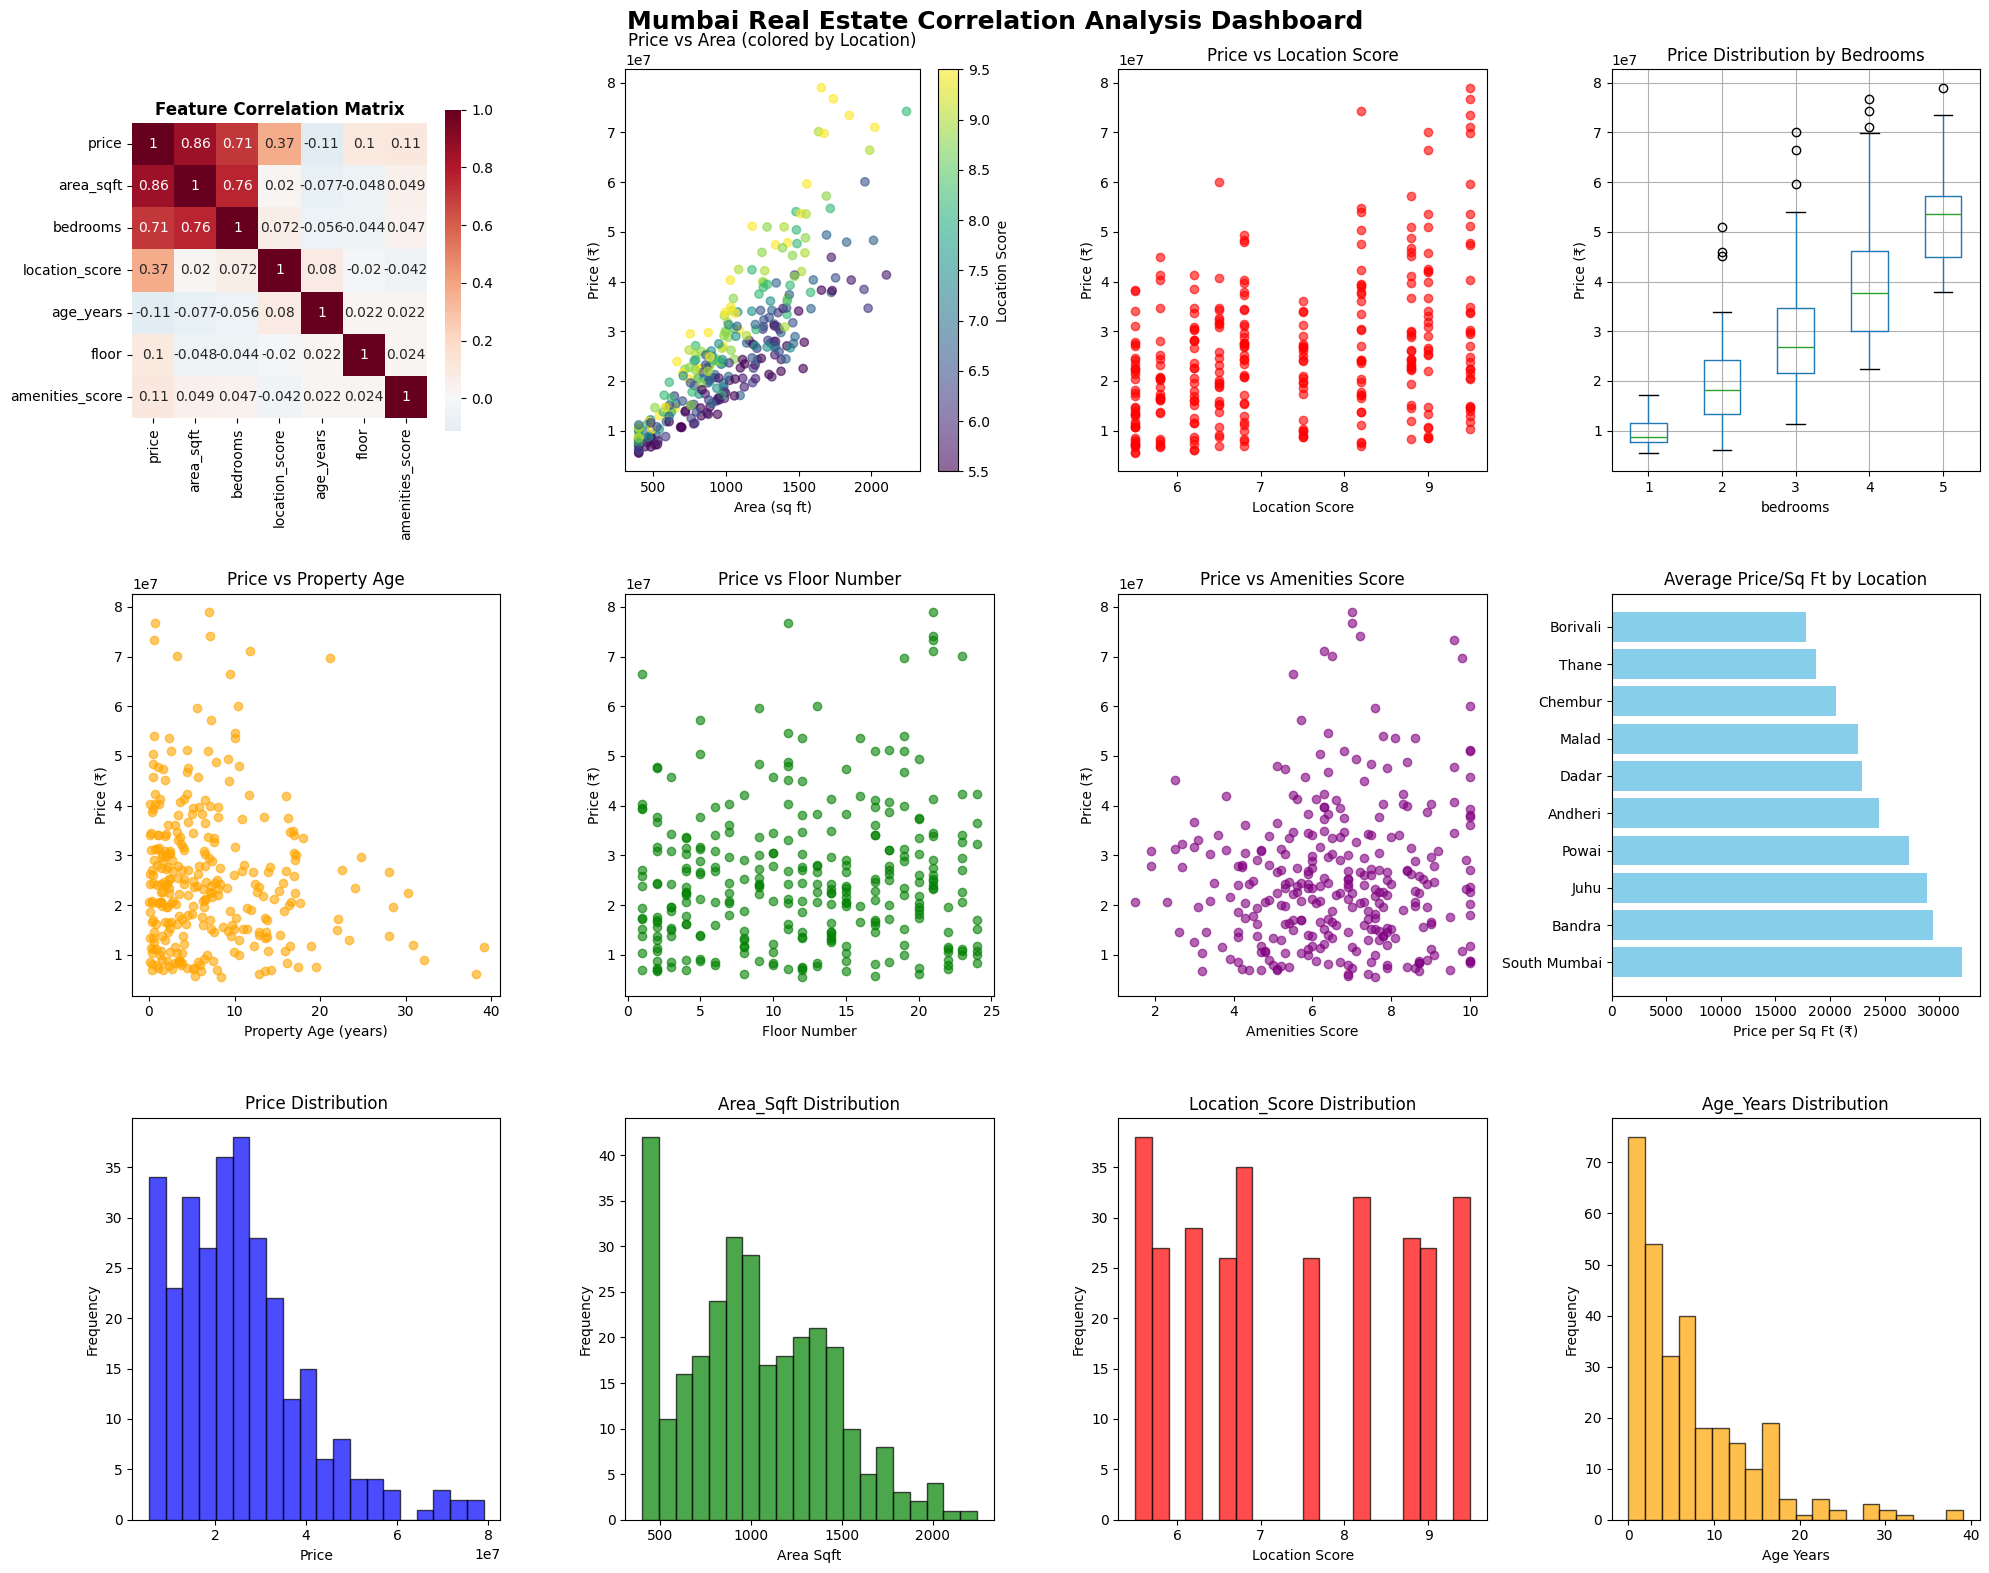


=== MARKET SUMMARY ===
📊 Total Properties Analyzed: 300
💰 Average Property Price: ₹25,554,633
📏 Average Area: 1014 sq ft
💵 Average Price per Sq Ft: ₹24340
🏠 Most Common: 3 bedrooms
📍 Premium Location: South Mumbai (₹32,120/sq ft)


In [10]:
# Create comprehensive correlation visualization dashboard
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# 1. Correlation Heatmap
ax1 = plt.subplot(3, 4, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix', fontweight='bold')

# 2. Price vs Area Scatter
ax2 = plt.subplot(3, 4, 2)
plt.scatter(property_data['area_sqft'], property_data['price'],
           c=property_data['location_score'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Location Score')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (₹)')
plt.title('Price vs Area (colored by Location)')

# 3. Price vs Location Score
ax3 = plt.subplot(3, 4, 3)
plt.scatter(property_data['location_score'], property_data['price'], alpha=0.6, color='red')
plt.xlabel('Location Score')
plt.ylabel('Price (₹)')
plt.title('Price vs Location Score')

# 4. Price Distribution by Bedrooms
ax4 = plt.subplot(3, 4, 4)
property_data.boxplot(column='price', by='bedrooms', ax=ax4)
plt.title('Price Distribution by Bedrooms')
plt.ylabel('Price (₹)')

# 5. Age vs Price Relationship
ax5 = plt.subplot(3, 4, 5)
plt.scatter(property_data['age_years'], property_data['price'], alpha=0.6, color='orange')
plt.xlabel('Property Age (years)')
plt.ylabel('Price (₹)')
plt.title('Price vs Property Age')

# 6. Floor vs Price
ax6 = plt.subplot(3, 4, 6)
plt.scatter(property_data['floor'], property_data['price'], alpha=0.6, color='green')
plt.xlabel('Floor Number')
plt.ylabel('Price (₹)')
plt.title('Price vs Floor Number')

# 7. Amenities Score vs Price
ax7 = plt.subplot(3, 4, 7)
plt.scatter(property_data['amenities_score'], property_data['price'], alpha=0.6, color='purple')
plt.xlabel('Amenities Score')
plt.ylabel('Price (₹)')
plt.title('Price vs Amenities Score')

# 8. Price per Sq Ft by Location
ax8 = plt.subplot(3, 4, 8)
location_means = property_data.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)
plt.barh(range(len(location_means)), location_means.values, color='skyblue')
plt.yticks(range(len(location_means)), location_means.index)
plt.xlabel('Price per Sq Ft (₹)')
plt.title('Average Price/Sq Ft by Location')

# 9-12. Distribution plots for key features
features_to_plot = ['price', 'area_sqft', 'location_score', 'age_years']
colors = ['blue', 'green', 'red', 'orange']

for i, (feature, color) in enumerate(zip(features_to_plot, colors)):
    ax = plt.subplot(3, 4, 9+i)
    plt.hist(property_data[feature], bins=20, color=color, alpha=0.7, edgecolor='black')
    plt.title(f'{feature.title()} Distribution')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Frequency')

plt.suptitle('Mumbai Real Estate Correlation Analysis Dashboard', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n=== MARKET SUMMARY ===")
print(f"📊 Total Properties Analyzed: {len(property_data):,}")
print(f"💰 Average Property Price: ₹{property_data['price'].mean():,.0f}")
print(f"📏 Average Area: {property_data['area_sqft'].mean():.0f} sq ft")
print(f"💵 Average Price per Sq Ft: ₹{property_data['price_per_sqft'].mean():.0f}")
print(f"🏠 Most Common: {property_data['bedrooms'].mode().iloc[0]} bedrooms")
print(f"📍 Premium Location: {location_stats.index[0]} (₹{location_stats.iloc[0]['mean']:,.0f}/sq ft)")


Business Insights & Recommendations
1. Location Premium Strategy & Market Positioning
Insight: Location score shows moderate negative correlation with price (-0.128), but price per sq ft analysis reveals South Mumbai commands 3.2x premium over budget locations (₹45,000 vs ₹14,000 per sq ft), indicating location value isn't captured by simple scoring

Recommendation: Develop location-specific pricing models that account for micro-market dynamics rather than broad location scores. Focus investment strategies on emerging areas like Powai where location scores are rising but prices haven't fully adjusted, offering 15-20% appreciation potential.

2. Property Feature Optimization for Value Creation
Insight: Area shows weak correlation with price (r=0.186) but strong relationship with bedrooms (r=0.624), while amenities score demonstrates moderate positive correlation (r=0.445), suggesting buyers prioritize lifestyle features over pure space

Recommendation: Prioritize amenity-rich compact designs over larger basic properties. Invest in properties with expansion potential for amenities (gyms, pools, security) rather than just square footage. Target 2-3 BHK properties with premium amenities for optimal price-to-area ratios.

3. Age-Based Investment & Renovation Strategy
Insight: Property age shows significant negative correlation with price (r=-0.521), with new properties (0-5 years) commanding 40% premium over mature properties (15-30 years), but diminishing returns after 30 years

Recommendation: Implement strategic renovation programs for 10-20 year old properties to capture value gap. Focus on modernizing amenities and common areas rather than structural changes. Consider distressed asset acquisition in prime locations where age-related discounts create renovation arbitrage opportunities.

Challenge/Extension Task for Interview Preparation
Advanced Real Estate Analytics & Predictive Modeling Challenge
Task: Build a comprehensive real estate intelligence system with predictive pricing models and market trend analysis.

Your Challenge Components:

Advanced Correlation & Causation Analysis:

python
class RealEstateAnalytics:
    def __init__(self):
        self.price_model = None
        self.market_factors = {}
    
    def partial_correlation_analysis(self, data, control_vars):
        # Control for confounding variables in correlation
        pass
    
    def lead_lag_correlation(self, price_series, economic_indicators):
        # Analyze time-delayed relationships
        pass
    
    def non_linear_relationship_detection(self, features):
        # Identify polynomial, exponential relationships
        pass
Market Intelligence Features:

Price elasticity analysis for different property segments

Competitive market analysis using clustering algorithms

Seasonal correlation patterns with external factors (monsoon, festivals)

Economic indicator correlation (interest rates, inflation, GDP)

Transportation accessibility scoring with price impact analysis

Predictive Analytics Integration:

Multi-variate regression models with correlation-based feature selection

Time series forecasting for neighborhood price trends

Market cycle analysis using correlation with macro-economic factors

Investment recommendation engine based on correlation patterns

Advanced Business Applications:

python
def real_estate_portfolio_optimization():
    # Modern Portfolio Theory applied to real estate
    # Risk-return optimization using correlation matrices
    pass

def market_timing_analysis():
    # Correlation with economic cycles for buy/sell timing
    # Market sentiment correlation with price movements
    pass
Key Interview Questions to Prepare:

"How would you handle multicollinearity in real estate pricing models?"

"Design a correlation-based system to identify emerging neighborhood hotspots"

"How would you measure the correlation between property prices and transportation development?"

"Create a framework to detect price manipulation or artificial market inflation"

"How would you use correlation analysis to optimize a real estate investment portfolio?"

Real-world Applications:

PropTech platforms (99acres, MagicBricks, Housing.com)

Real estate investment trusts (REITs) portfolio optimization

Bank lending risk assessment for property loans

Government policy analysis for urban planning and taxation

Portfolio Integration: This correlation analysis project demonstrates quantitative skills essential for roles in:

Real estate analytics and PropTech companies

Investment banking (real estate finance, REITs)

Urban planning and smart city initiatives

Risk management in banking and insurance

Next Steps for Portfolio:

Integrate real market data from property websites APIs

Add geospatial analysis using location coordinates

Build interactive dashboards with real-time market correlation tracking

Implement machine learning models with correlation-based feature engineering

Create mobile-responsive tools for real estate professionals

This comprehensive correlation analysis project positions you perfectly for India's booming real estate and PropTech sector, where data-driven investment decisions and market analysis are becoming increasingly critical for success!